Creating field-aligned meshes
=============================

FusionSC can used its field line maps to transform meshes between field-aligned coordinates and real-space. This examples shows how to move between the different views.

In [37]:
import fusionsc as fsc
from fusionsc.devices import w7x

import numpy as np
import matplotlib.pyplot as plt

import pyvista as pv
pv.set_jupyter_backend('static')

For this example, we want to use standard configuration and the lower W7-X divertors in modules 1 and 2

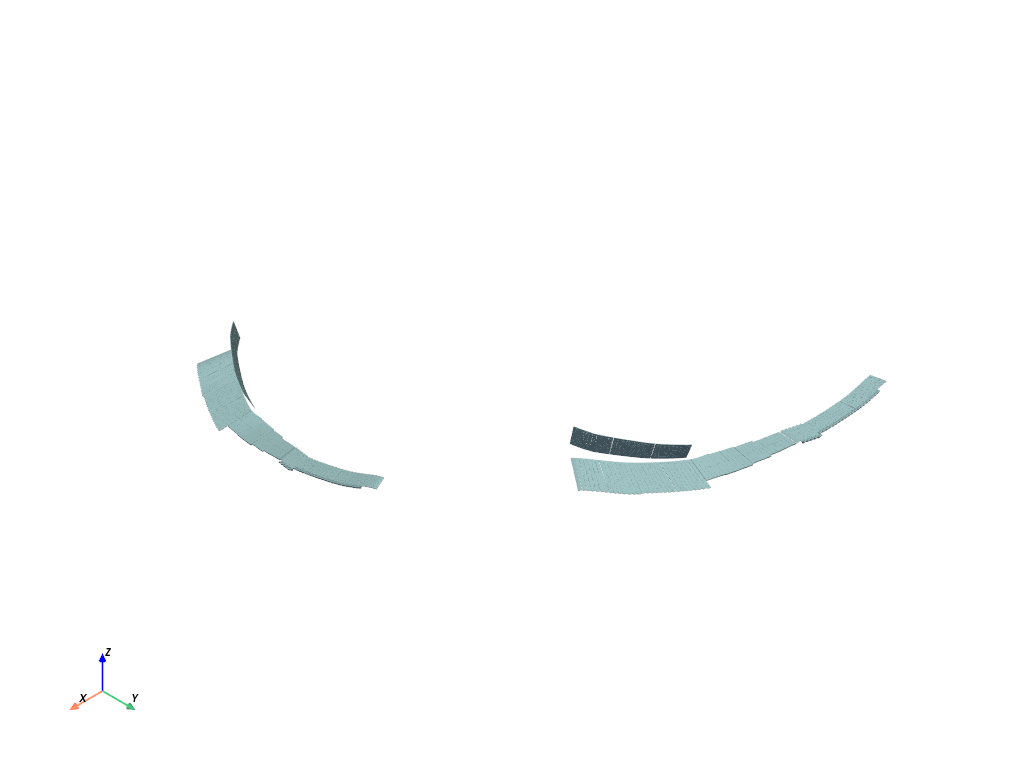

In [2]:
geo = w7x.divertor().filter({"moduleNo" : [1, 2], "upper" : 0}).merge()
mapping = w7x.computeMapping(w7x.standard())

geo.asPyvista().plot()

In [3]:
# TODO: Remove after release
fsc.backends.alwaysUseBackend(fsc.backends.localBackend())

Let's have a look what the divertor looks like in straight-field coordinates. We expand around the divertor bean plane at phi = 0.

C:\Users\Knieps\Documents\repos\fsc\src\python\fusionsc\_api_markers.py:15: UserWarning: The function fusionsc.geometry.Geometry.toFieldAligned is part of the unstable API. It might change or get removed in the near future. While unlikely, it might also not be compatible across client/server versions.
  warnings.warn(f"The function {f.__module__}.{f.__qualname__} is part of the unstable API. It might change or get removed in the near future. While unlikely, it might also not be compatible across client/server versions.")


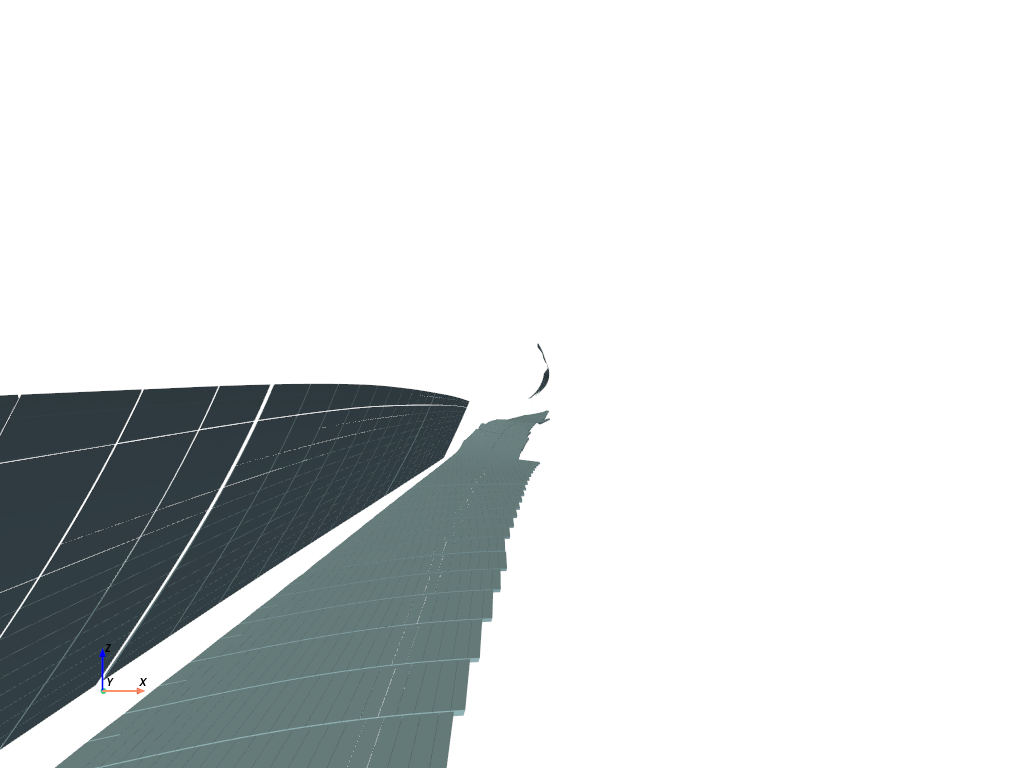

In [38]:
fa = geo.triangulate(0.01).toFieldAligned(mapping, r0 = 5.5, phi0 = 0)
fa.asPyvista().plot(cpos = [[6,-10,-0.5],[5.5,6,-0.5],[0,0,1]])

It appears that the divertor is indeed fairly straight when viewed in field-aligned coordinates. However, it can also be seen that the next divertor appears quite deformed in that perspective (which makes sense, as it should be covering a different flux tube).

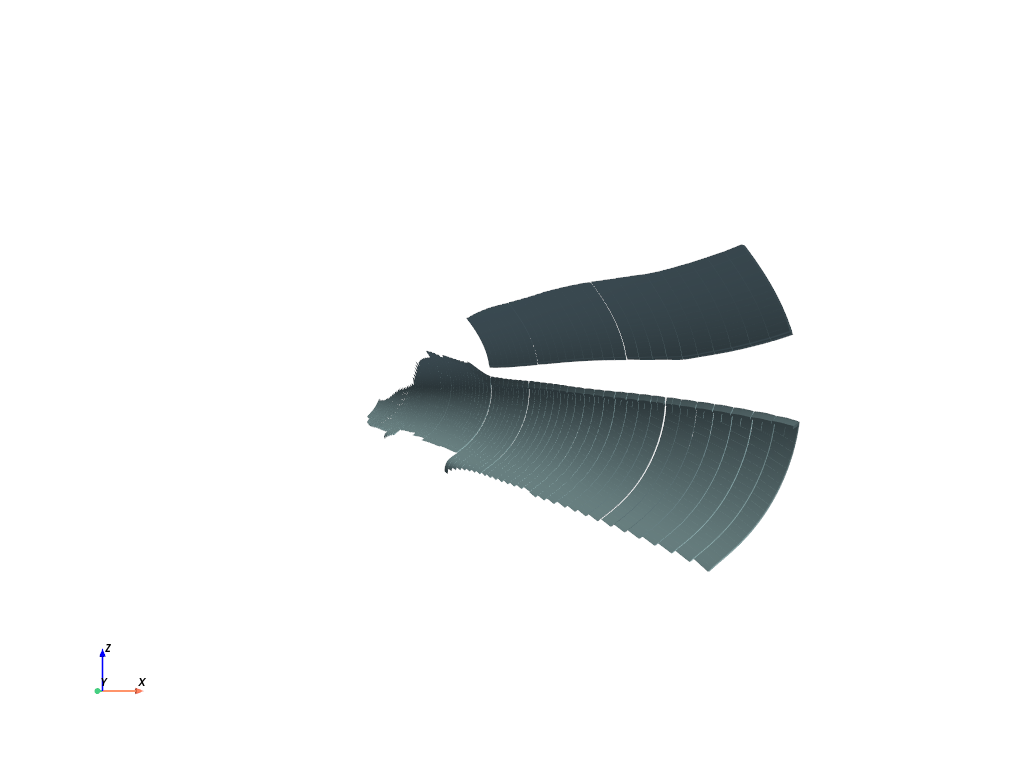

In [39]:
fa.asPyvista().plot(cpos = [[3,25,0],[5.5,40,0],[0,0,1]])

On the other hand, if we were to try to design our own divertor structure, it helps a lot to create these in field aligned coordinates. In this case, we show that by just setting up two quads in field-aligned space. To do this, we use the "quadMesh" function that creates quad meshes from N by M grids in 2D space. For the fun of it, we will also give the parts a 1 degree pitch angle against the magnetic field.

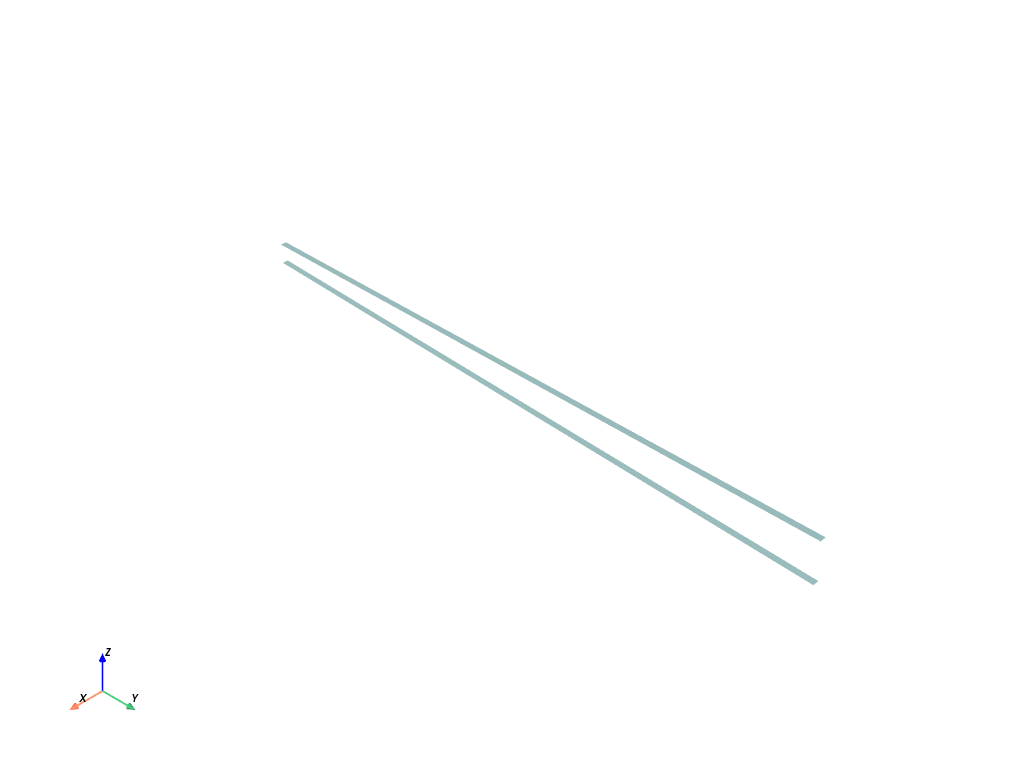

In [56]:
z1 = -0.5
z2 = 0.5

quad1 = [
    [[5.5, 5.7], [5.5, 5.7]], # X values of corners on 2x2 grid
    [[-10, -10], [10, 10]], # Y values of cornerss on 2x2 grid
    [[z1, z1], [z1, z1]] # Z values of cornerss on 2x2 grid
]

quad2 = [
    [[5.5, 5.7], [5.5, 5.7]],
    [[-10, -10], [10, 10]],
    [[z2, z2], [z2, z2]]
]

geo1 = fsc.geometry.Geometry.quadMesh(quad1)
geo2 = fsc.geometry.Geometry.quadMesh(quad2)

pitchAngle = np.radians(1) # Pitch angle of 5 degrees
# Note: rotate can also rotate around non-origin centers, but we just
# want to rotate around [0,0,0] so we omit the "center" argument
geo1 = geo1.rotate(-pitchAngle, axis = [1,0,0])
geo2 = geo2.rotate(pitchAngle, axis = [1,0,0])

geoIn = geo1 + geo2
geoIn.asPyvista().plot(jupyter_backend="static")

To make sure we follow the curve of the field in the geometry, we first upsample the quads to 1cm edge length, then transform from field space into real-space.

C:\Users\Knieps\Documents\repos\fsc\src\python\fusionsc\_api_markers.py:15: UserWarning: The function fusionsc.geometry.Geometry.fromFieldAligned is part of the unstable API. It might change or get removed in the near future. While unlikely, it might also not be compatible across client/server versions.
  warnings.warn(f"The function {f.__module__}.{f.__qualname__} is part of the unstable API. It might change or get removed in the near future. While unlikely, it might also not be compatible across client/server versions.")


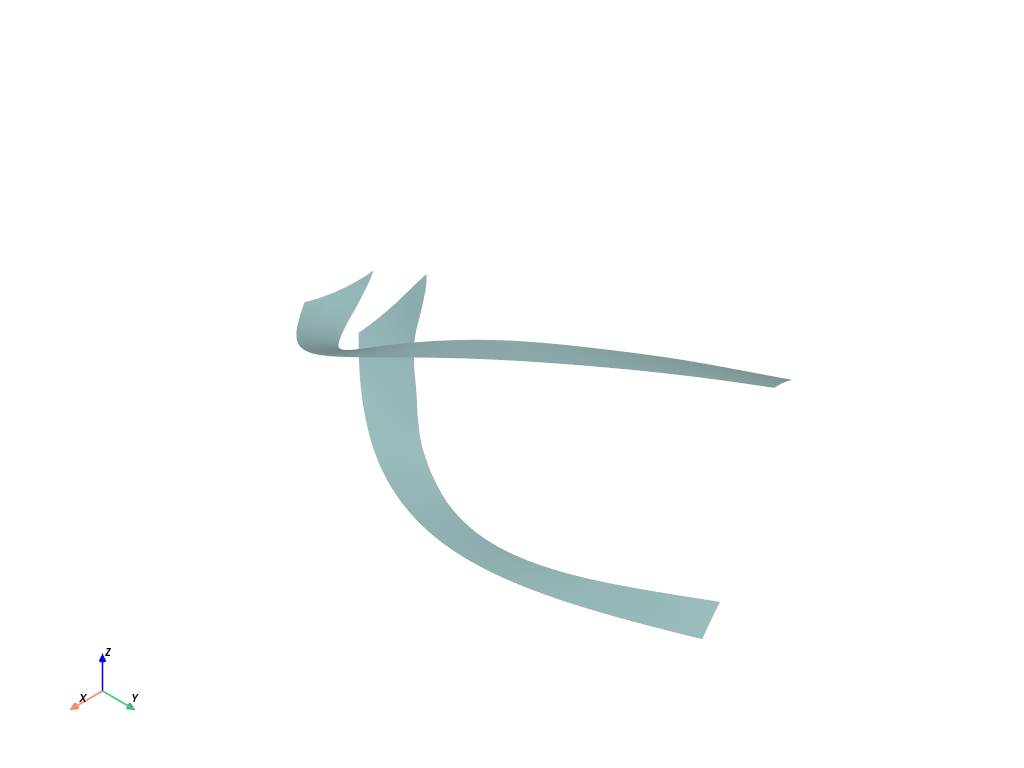

In [57]:
newGeo = geoIn.triangulate(0.01).fromFieldAligned(mapping, 5.5, 0)
newGeo.asPyvista().plot()